In [29]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage.feature import canny
from skimage import filters
from skimage import segmentation
from skimage import data, exposure
from skimage.exposure import histogram
from skimage.feature import match_template
from skimage.transform import rescale
from skimage.util import random_noise
from scipy.signal import correlate2d
from skimage import io
from skimage.transform import resize

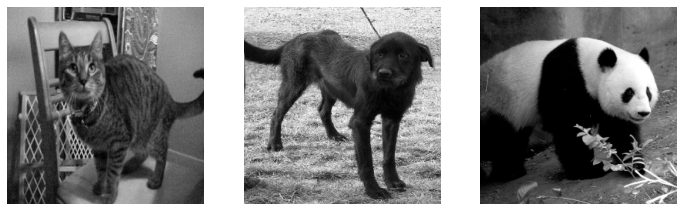

In [30]:
pixelsPerCells = (8,8)
size = 256

cats = [resize(io.imread(f"animals/cats/cats_" + f"{idx:05d}" + ".jpg", as_gray=True), (size, size)) for idx in range(1,50)]
dogs = [resize(io.imread(f"animals/dogs/dogs_"+ f"{idx:05d}" + ".jpg", as_gray=True), (size, size)) for idx in range(1,50)]
pandas = [resize(io.imread(f"animals/pandas/panda_" + f"{idx:05d}" + ".jpg", as_gray=True), (size, size)) for idx in range(1,50)]
images = cats + dogs + pandas

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axes[0].imshow(cats[0], cmap="gray") and axes[0].axis('off')
axes[1].imshow(dogs[0], cmap="gray") and axes[1].axis('off')
axes[2].imshow(pandas[0], cmap="gray") and axes[2].axis('off')

plt.show()

In [31]:
cats_canny = [canny(resize(io.imread(f"animals/cats/cats_" + f"{idx:05d}" + ".jpg", as_gray=True), (size, size)), sigma=2, low_threshold=0.1, high_threshold=0.3) for idx in range(1,50)]
dogs_canny = [canny(resize(io.imread(f"animals/dogs/dogs_"+ f"{idx:05d}" + ".jpg", as_gray=True), (size, size)), sigma=2, low_threshold=0.1, high_threshold=0.3) for idx in range(1,50)]
pandas_canny = [canny(resize(io.imread(f"animals/pandas/panda_" + f"{idx:05d}" + ".jpg", as_gray=True), (size, size)), sigma=2, low_threshold=0.1, high_threshold=0.3) for idx in range(1,50)]

# étiquettes (1 pour les chats, 2 pour les chiens, 3 pour les pandas)
cats_labels = 1 * np.ones((len(cats_canny), ))
dogs_labels = 2 * np.ones((len(dogs_canny), ))
pandas_labels = 3 * np.ones((len(pandas_canny), ))

dataset = np.concatenate((cats_canny, dogs_canny, pandas_canny))

labels = np.concatenate((cats_labels, dogs_labels, pandas_labels)).astype("int")
print(labels.shape)

(147,)


In [32]:
success = 0
for idx in range(1,49):
  query = resize(io.imread("animals/cats/cats_" + f"{idx:05d}" + ".jpg", as_gray=True), (size, size))
  # query = resize(io.imread("animals/dogs/dogs_" + f"{idx:05d}" + ".jpg", as_gray=True), (size, size))
  # query = resize(io.imread("animals/pandas/panda_" + f"{idx:05d}" + ".jpg", as_gray=True), (size, size))
  edges = canny(query, sigma=2, low_threshold=0.1, high_threshold=0.3)
  hog_query = hog(edges, orientations=8, pixels_per_cell=pixelsPerCells, cells_per_block=(1, 1))
  
  scores = np.array([])
  for egdes_animal in dataset:
    hog_edges = hog(egdes_animal, orientations=8, pixels_per_cell=pixelsPerCells, cells_per_block=(1, 1))
    scores = np.append(scores, [np.linalg.norm(hog_query - hog_edges)])

  closest = np.argsort(scores)

  k = 50
  closest_labels = labels[closest[:k]]

  if (np.argmax(np.bincount(closest_labels)) == 1):
    print("Image : ", idx, "succeeded")
    success += 1
  else:
    print("Image : ", idx, "failed")


print("Taux de réussite : " , success , "/50")


Image :  1 failed
Image :  2 failed
Image :  3 succeeded
Image :  4 failed
Image :  5 failed
Image :  6 failed
Image :  7 succeeded
Image :  8 succeeded
Image :  9 succeeded
Image :  10 failed
Image :  11 failed
Image :  12 failed
Image :  13 failed
Image :  14 failed
Image :  15 failed
Image :  16 failed
Image :  17 failed
Image :  18 failed
Image :  19 succeeded
Image :  20 failed
Image :  21 failed
Image :  22 failed
Image :  23 failed
Image :  24 failed
Image :  25 succeeded
Image :  26 failed
Image :  27 succeeded
Image :  28 failed
Image :  29 succeeded
Image :  30 succeeded
Image :  31 succeeded
Image :  32 failed
Image :  33 succeeded
Image :  34 failed
Image :  35 failed
Image :  36 failed
Image :  37 failed
Image :  38 failed
Image :  39 failed
Image :  40 succeeded
Image :  41 failed
Image :  42 failed
Image :  43 succeeded
Image :  44 failed
Image :  45 failed
Image :  46 failed
Image :  47 failed
Image :  48 succeeded
Taux de réussite :  14 /50
